In [1]:

from src.class_item import Item
import numpy as np
from src.class_packing import Packing

In [2]:
from copy import copy
from matplotlib import pyplot as plt, patches


def draw_segments(item, h):

    n_x1 = 0
    n_y1 = 0
    for point in item.points:
        if point[0] > n_x1:
            n_x1 = copy(point[0])
        if point[1] > n_y1:
            n_y1 = copy(point[1])
    pallet_width = n_x1
    pallet_height = n_y1

    fig, ax = plt.subplots()

    ax.set_xlim(-0.5, pallet_width + 2)
    ax.set_ylim(-0.5, pallet_height + 2)

    for i in range(len(item.segments)):
        plt.plot([0, pallet_width], [i*h, i*h], color = 'black', linestyle=':')

    figure = patches.Polygon(item.points,
                                linewidth=1,
                                edgecolor='red',
                                fill=False)
    ax.add_patch(figure)

    for i in range(len(item.segments)):
        for sigment in item.segments[i]:
            if sigment[0] != sigment[1]:
                plt.plot(sigment, [i*h, i*h], color = 'blue')
            else:
                ax.scatter(sigment[0], i*h, color = 'blue', s = 4)
    # plt.savefig('swim_to_sigments ' + str(item.id) + ' with h = ' + str(h) + '.png')
    plt.show()

In [3]:
input_file_name = 'swim.txt'
width=5752
height=15000
# num_rot=4
# num_sort=2
eps=0.0

"""Входные данные типа swim.txt (trousers.txt)"""
# ------------  чтение файла  ------------
path = 'swim.txt'
# path = "src\\input\\" + input_file_name
f = open(path, 'r')
line = f.readline()
polygons = []
while line:
    f.readline()  #QUANTITY
    quantity = int(f.readline().split(' ')[0][:-1])
    f.readline()  #NUMBER OF VERTICES
    num_verties = int(f.readline().split(' ')[0][:-1])
    f.readline()  #VERTICES (X,Y)
    polygon = []
    for _ in range(num_verties):
        line = f.readline()
        list_point = (''.join([
            line[i] for i in range(len(line) - 1)
            if not ((line[i] == ' ') and (line[i + 1] == ' '))
        ])).split(' ')
        point = [float(list_point[-2]), float(list_point[-1])]
        polygon.append(copy(point))
    for _ in range(quantity):
        polygons.append(copy(polygon))

    f.readline()  #
    line = f.readline()  #PIECE k
f.close()
# ------------  Упаковка  ------------
packing = Packing(width=width,
                    height=height,
                    drill_radius=0,
                    border_distance=0)

packing.polygons = copy(polygons)
packing.num_items = len(polygons)

packing.items = np.full(packing.num_items, None)
for id in range(packing.num_items):
    item = Item(id, copy(polygons[id]))
    packing.items[id] = copy(item)

#
# for item in packing.items:
#     print(item.points)

In [4]:
from datetime import datetime
from src.greedy_alg.class_pallets import Pallets

h = 36

# packing = Packing(width=width, height=height, drill_radius=0)

pallets = Pallets([width, height])
pallets.grid_step = h
pallets.add_pallet_lines()

packing.pallets = pallets
packing.h = h
packing.add_segments_for_items()

# for item in packing.items:
#     print(item.points)

# for item in packing.items:
#     draw_segments(item, h)

0:00:02.183245
[0, 0]
[1742.0, 0]
[3484.0, 0]
[4563.0, 22]
[991.0, 24]
[2733.0, 24]
[0, 28]
[3620.0, 29]
[1826.0515777792207, 30]
[0, 40]
[1921.645161, 42]
[3685.3287835384617, 42]
[0, 59]
[3520.290322, 60]
[1927.1569720236218, 63]
[0, 78]
[1351.454902, 78]
[3866.8021330236215, 80]
[2400.425526, 84]
[0, 86]
[3638.39219278867, 88]
[1115.2666665459, 86]
[2302.301960663547, 91]
[3488.301960663547, 95]
[0, 100]
[1314.691229, 119]
[2501.726523117647, 124]
[3727.3931897393395, 120]
[0.0, 123]
[1275.0, 140]
[4559.852164854726, 140]
[2611.0245621084623, 146]
[0.0, 153]
[1404.8, 166]
[3564.0245621084623, 171]
[1101.0, 176]
[2551.8, 181]
[159.0, 184]
[4526.548902108462, 190]
[5226.0, 0]
[5318.0, 32]
[1939.645161, 51]
[5218.257035023622, 78]
[4989.84709478867, 88]
[4666.336443422168, 95]
[1306.0, 195]
[2659.0, 200]
[0, 204]


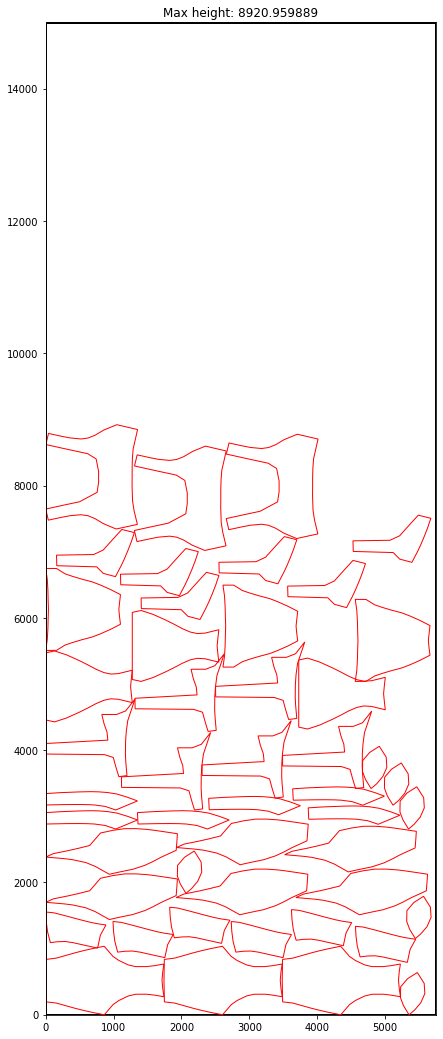

In [5]:
start_time = datetime.now()
packing.segments_bottom_left()
print(datetime.now() - start_time)
packing.draw_segments_packing()